# Uber DataFrame
- This notebook combines multiple Market indicators into one massive DataFrame
- That DataFrame will be used for Machine Learning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Fetch-Data" data-toc-modified-id="Fetch-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fetch Data</a></span></li><li><span><a href="#Explore-Data" data-toc-modified-id="Explore-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore Data</a></span></li><li><span><a href="#Trim--Common-Date-Span" data-toc-modified-id="Trim--Common-Date-Span-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Trim  Common Date Span</a></span></li><li><span><a href="#Build-UBER-DataFrame" data-toc-modified-id="Build-UBER-DataFrame-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build UBER DataFrame</a></span></li><li><span><a href="#Visualize-the-dependencies" data-toc-modified-id="Visualize-the-dependencies-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualize the dependencies</a></span></li><li><span><a href="#Divide-Training-and-Prediction-data-sets" data-toc-modified-id="Divide-Training-and-Prediction-data-sets-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Divide Training and Prediction data sets</a></span><ul class="toc-item"><li><span><a href="#Save-Datasets" data-toc-modified-id="Save-Datasets-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Save Datasets</a></span></li></ul></li></ul></div>

## Set Up

In [1]:
dir="../Data/processed/"
dataset_file_name = "uber.csv"

include("../Julia/functions.jl") 
include("../Julia/IndicatorData.jl") 
include("../Julia/function_format_rata_die_to_us_date.jl")
include("../Julia/function_trim_DataFrames.jl")
println()

## Fetch Data

In [2]:
data = Dict{String, IndicatorData}()

## Do NOT use "^" in names as in "^VIX"
addIndicator!(data, "AAPL", "AAPL.csv" )
addIndicator!(data, "VIX", "^VIX.csv" )
addIndicator!(data, "DJIA", "^DJI.csv" )
addIndicator!(data, "US_ISM_MFC_EMP"  , "united-states.ism-manufacturing-employment.csv" )
addIndicator!(data, "US_HOUS_STRT_M"  , "united-states.housing-starts-mm.csv" )
addIndicator!(data, "US_ISM_MFC_PMI"  , "united-states.ism-manufacturing-pmi.csv" )
addIndicator!(data, "US_INIT_JOBLESS" , "united-states.initial-jobless-claims.csv" )
addIndicator!(data, "US_GDP_Q"        , "united-states.gross-domestic-product-qq.csv" )
addIndicator!(data, "NIO"             , "NIO.csv" )
addIndicator!(data, "NVDA"            , "NVDA.csv" )




print()

Fetched ../Data/processed/AAPL.csv, record count 14637
Fetched ../Data/processed/^VIX.csv, record count 11329
Fetched ../Data/processed/^DJI.csv, record count 13128
Fetched ../Data/processed/united-states.ism-manufacturing-employment.csv, record count 2626
Fetched ../Data/processed/united-states.housing-starts-mm.csv, record count 1823
Fetched ../Data/processed/united-states.ism-manufacturing-pmi.csv, record count 5063
Fetched ../Data/processed/united-states.initial-jobless-claims.csv, record count 5069
Fetched ../Data/processed/united-states.gross-domestic-product-qq.csv, record count 5063
Fetched ../Data/processed/NIO.csv, record count 849
Fetched ../Data/processed/NVDA.csv, record count 8022


## Explore Data

In [3]:
data

Dict{String,IndicatorData} with 10 entries:
  "VIX"             => IndicatorData("VIX", "^VIX.csv", 11329×10 DataFrame. Omi…
  "US_GDP_Q"        => IndicatorData("US_GDP_Q", "united-states.gross-domestic-…
  "US_ISM_MFC_PMI"  => IndicatorData("US_ISM_MFC_PMI", "united-states.ism-manuf…
  "NIO"             => IndicatorData("NIO", "NIO.csv", 849×10 DataFrame. Omitte…
  "NVDA"            => IndicatorData("NVDA", "NVDA.csv", 8022×10 DataFrame. Omi…
  "DJIA"            => IndicatorData("DJIA", "^DJI.csv", 13128×10 DataFrame. Om…
  "AAPL"            => IndicatorData("AAPL", "AAPL.csv", 14637×10 DataFrame. Om…
  "US_INIT_JOBLESS" => IndicatorData("US_INIT_JOBLESS", "united-states.initial-…
  "US_ISM_MFC_EMP"  => IndicatorData("US_ISM_MFC_EMP", "united-states.ism-manuf…
  "US_HOUS_STRT_M"  => IndicatorData("US_HOUS_STRT_M", "united-states.housing-s…

In [4]:
data["AAPL"].min_rata_die

723161

In [5]:
using Statistics
describe(data["AAPL"].df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,730479.0,723161,730479.0,737797,,,Int64
2,Date,,1980-12-12,,2021-01-07,14637,,Date
3,Original,10.0789,0.0,0.450536,137.98,,,Float64
4,Quantized,-109.352,-128.0,-127.0,127.0,,,Float64
5,Avg005,-109.349,-128.0,-127.0,115.6,,,Float64
6,Avg030,-109.329,-128.0,-127.0,105.0,,,Float64
7,Avg060,-109.301,-128.0,-127.0,99.48,,,Float64
8,Avg090,-109.266,-128.0,-127.0,96.26,,,Float64
9,Avg120,-109.228,-128.0,-127.0,93.33,,,Float64


## Trim  Common Date Span

Example:
- for all the DataFrames
- find lowest dates
- select the highest (common) of them

In [6]:
trim_DataFrames!(data) # include("../Julia/function_trim_DataFrames.jl")

 - VIX min_rata_die = 726469
 - US_GDP_Q min_rata_die = 732735
 - US_ISM_MFC_PMI min_rata_die = 732736
 - NIO min_rata_die = 736949
 - NVDA min_rata_die = 729776
 - DJIA min_rata_die = 724670
 - AAPL min_rata_die = 723161
 - US_INIT_JOBLESS min_rata_die = 732729
 - US_ISM_MFC_EMP min_rata_die = 735173
 - US_HOUS_STRT_M min_rata_die = 735975
oldest = 736949 Int64
 - VIX max_rata_die = 737797
 - US_GDP_Q max_rata_die = 737797
 - US_ISM_MFC_PMI max_rata_die = 737798
 - NIO max_rata_die = 737797
 - NVDA max_rata_die = 737797
 - DJIA max_rata_die = 737797
 - AAPL max_rata_die = 737797
 - US_INIT_JOBLESS max_rata_die = 737797
 - US_ISM_MFC_EMP max_rata_die = 737798
 - US_HOUS_STRT_M max_rata_die = 737797
newest = 737797 Int64
 - BEFORE VIX size (11329, 10)
 - AFTER  VIX size (849, 10)
 - BEFORE US_GDP_Q size (5063, 10)
 - AFTER  US_GDP_Q size (849, 10)
 - BEFORE US_ISM_MFC_PMI size (5063, 9)
 - AFTER  US_ISM_MFC_PMI size (849, 9)
 - BEFORE NIO size (849, 10)
 - AFTER  NIO size (849, 10)
 - B

## Build UBER DataFrame

In [7]:
## Print POSSIBLE fields for UBER DataFrame

for key in keys(data) 
    #df = data[key].df
    columns = names(data[key].df) # Symbols, not Strings
    for i in 1:length(columns)
        if occursin("Avg", string(columns[i]) ) # include only averages
            println(",", data[key].name, "_",columns[i], 
                " = data[\"", data[key].name, "\"].df[:,:", columns[i], "] ") 
        end # if
    end
end

,VIX_Rata_Die = data["VIX"].df[:,:Rata_Die] 
,VIX_Date = data["VIX"].df[:,:Date] 
,VIX_Original = data["VIX"].df[:,:Original] 
,VIX_Quantized = data["VIX"].df[:,:Quantized] 
,VIX_Avg005 = data["VIX"].df[:,:Avg005] 
,VIX_Avg030 = data["VIX"].df[:,:Avg030] 
,VIX_Avg060 = data["VIX"].df[:,:Avg060] 
,VIX_Avg090 = data["VIX"].df[:,:Avg090] 
,VIX_Avg120 = data["VIX"].df[:,:Avg120] 
,VIX_Avg180 = data["VIX"].df[:,:Avg180] 
,US_GDP_Q_Rata_Die = data["US_GDP_Q"].df[:,:Rata_Die] 
,US_GDP_Q_Date = data["US_GDP_Q"].df[:,:Date] 
,US_GDP_Q_Original = data["US_GDP_Q"].df[:,:Original] 
,US_GDP_Q_Quantized = data["US_GDP_Q"].df[:,:Quantized] 
,US_GDP_Q_Avg005 = data["US_GDP_Q"].df[:,:Avg005] 
,US_GDP_Q_Avg030 = data["US_GDP_Q"].df[:,:Avg030] 
,US_GDP_Q_Avg060 = data["US_GDP_Q"].df[:,:Avg060] 
,US_GDP_Q_Avg090 = data["US_GDP_Q"].df[:,:Avg090] 
,US_GDP_Q_Avg120 = data["US_GDP_Q"].df[:,:Avg120] 
,US_GDP_Q_Avg180 = data["US_GDP_Q"].df[:,:Avg180] 
,US_ISM_MFC_PMI_Rata_Die = data["US_ISM_MFC_PMI"].df[:,:Rata

In [14]:
using DataFrames

## example column_name = data["SYMBOL"].df[:,:column_name] 

uber = DataFrame(  

 Rata_Die = data["VIX"].df[:,:Rata_Die] 
,Date = data["VIX"].df[:,:Date] 
    
,VIX_Original = data["VIX"].df[:,:Original] 
,VIX_Quantized = data["VIX"].df[:,:Quantized] 
,VIX_Avg005 = data["VIX"].df[:,:Avg005] 
,VIX_Avg030 = data["VIX"].df[:,:Avg030] 
,VIX_Avg060 = data["VIX"].df[:,:Avg060] 
,VIX_Avg090 = data["VIX"].df[:,:Avg090] 
,VIX_Avg120 = data["VIX"].df[:,:Avg120] 
,VIX_Avg180 = data["VIX"].df[:,:Avg180] 
    

,US_GDP_Q_Original = data["US_GDP_Q"].df[:,:Original] 
,US_GDP_Q_Quantized = data["US_GDP_Q"].df[:,:Quantized] 
,US_GDP_Q_Avg005 = data["US_GDP_Q"].df[:,:Avg005] 
,US_GDP_Q_Avg030 = data["US_GDP_Q"].df[:,:Avg030] 
,US_GDP_Q_Avg060 = data["US_GDP_Q"].df[:,:Avg060] 
,US_GDP_Q_Avg090 = data["US_GDP_Q"].df[:,:Avg090] 
,US_GDP_Q_Avg120 = data["US_GDP_Q"].df[:,:Avg120] 
,US_GDP_Q_Avg180 = data["US_GDP_Q"].df[:,:Avg180] 
    

,US_ISM_MFC_PMI_Original = data["US_ISM_MFC_PMI"].df[:,:Original] 
,US_ISM_MFC_PMI_Quantized = data["US_ISM_MFC_PMI"].df[:,:Quantized] 
,US_ISM_MFC_PMI_Avg030 = data["US_ISM_MFC_PMI"].df[:,:Avg030] 
,US_ISM_MFC_PMI_Avg060 = data["US_ISM_MFC_PMI"].df[:,:Avg060] 
,US_ISM_MFC_PMI_Avg090 = data["US_ISM_MFC_PMI"].df[:,:Avg090] 
,US_ISM_MFC_PMI_Avg180 = data["US_ISM_MFC_PMI"].df[:,:Avg180] 
,US_ISM_MFC_PMI_Avg365 = data["US_ISM_MFC_PMI"].df[:,:Avg365]
    
 
,NIO_Original = data["NIO"].df[:,:Original] 
,NIO_Quantized = data["NIO"].df[:,:Quantized] 
,NIO_Avg005 = data["NIO"].df[:,:Avg005] 
,NIO_Avg030 = data["NIO"].df[:,:Avg030] 
,NIO_Avg060 = data["NIO"].df[:,:Avg060] 
,NIO_Avg090 = data["NIO"].df[:,:Avg090] 
,NIO_Avg120 = data["NIO"].df[:,:Avg120] 
,NIO_Avg180 = data["NIO"].df[:,:Avg180] 
    

,NVDA_Original = data["NVDA"].df[:,:Original] 
,NVDA_Quantized = data["NVDA"].df[:,:Quantized] 
,NVDA_Avg005 = data["NVDA"].df[:,:Avg005] 
,NVDA_Avg030 = data["NVDA"].df[:,:Avg030] 
,NVDA_Avg060 = data["NVDA"].df[:,:Avg060] 
,NVDA_Avg090 = data["NVDA"].df[:,:Avg090] 
,NVDA_Avg120 = data["NVDA"].df[:,:Avg120] 
,NVDA_Avg180 = data["NVDA"].df[:,:Avg180] 
    

,DJIA_Original = data["DJIA"].df[:,:Original] 
,DJIA_Quantized = data["DJIA"].df[:,:Quantized] 
,DJIA_Avg005 = data["DJIA"].df[:,:Avg005] 
,DJIA_Avg030 = data["DJIA"].df[:,:Avg030] 
,DJIA_Avg060 = data["DJIA"].df[:,:Avg060] 
,DJIA_Avg090 = data["DJIA"].df[:,:Avg090] 
,DJIA_Avg120 = data["DJIA"].df[:,:Avg120] 
,DJIA_Avg180 = data["DJIA"].df[:,:Avg180] 
    

,AAPL_Original = data["AAPL"].df[:,:Original] 
,AAPL_Quantized = data["AAPL"].df[:,:Quantized] 
,AAPL_Avg005 = data["AAPL"].df[:,:Avg005] 
,AAPL_Avg030 = data["AAPL"].df[:,:Avg030] 
,AAPL_Avg060 = data["AAPL"].df[:,:Avg060] 
,AAPL_Avg090 = data["AAPL"].df[:,:Avg090] 
,AAPL_Avg120 = data["AAPL"].df[:,:Avg120] 
,AAPL_Avg180 = data["AAPL"].df[:,:Avg180] 
    

,US_INIT_JOBLESS_Original = data["US_INIT_JOBLESS"].df[:,:Original] 
,US_INIT_JOBLESS_Quantized = data["US_INIT_JOBLESS"].df[:,:Quantized] 
,US_INIT_JOBLESS_Avg005 = data["US_INIT_JOBLESS"].df[:,:Avg005] 
,US_INIT_JOBLESS_Avg030 = data["US_INIT_JOBLESS"].df[:,:Avg030] 
,US_INIT_JOBLESS_Avg060 = data["US_INIT_JOBLESS"].df[:,:Avg060] 
,US_INIT_JOBLESS_Avg090 = data["US_INIT_JOBLESS"].df[:,:Avg090] 
,US_INIT_JOBLESS_Avg120 = data["US_INIT_JOBLESS"].df[:,:Avg120] 
,US_INIT_JOBLESS_Avg180 = data["US_INIT_JOBLESS"].df[:,:Avg180] 
    

,US_ISM_MFC_EMP_Original = data["US_ISM_MFC_EMP"].df[:,:Original] 
,US_ISM_MFC_EMP_Quantized = data["US_ISM_MFC_EMP"].df[:,:Quantized] 
,US_ISM_MFC_EMP_Avg030 = data["US_ISM_MFC_EMP"].df[:,:Avg030] 
,US_ISM_MFC_EMP_Avg060 = data["US_ISM_MFC_EMP"].df[:,:Avg060] 
,US_ISM_MFC_EMP_Avg090 = data["US_ISM_MFC_EMP"].df[:,:Avg090] 
,US_ISM_MFC_EMP_Avg120 = data["US_ISM_MFC_EMP"].df[:,:Avg120] 
,US_ISM_MFC_EMP_Avg180 = data["US_ISM_MFC_EMP"].df[:,:Avg180] 
,US_ISM_MFC_EMP_Avg365 = data["US_ISM_MFC_EMP"].df[:,:Avg365] 
    

,US_HOUS_STRT_M_Original = data["US_HOUS_STRT_M"].df[:,:Original] 
,US_HOUS_STRT_M_Quantized = data["US_HOUS_STRT_M"].df[:,:Quantized] 
,US_HOUS_STRT_M_Avg005 = data["US_HOUS_STRT_M"].df[:,:Avg005] 
,US_HOUS_STRT_M_Avg030 = data["US_HOUS_STRT_M"].df[:,:Avg030] 
,US_HOUS_STRT_M_Avg060 = data["US_HOUS_STRT_M"].df[:,:Avg060] 
,US_HOUS_STRT_M_Avg090 = data["US_HOUS_STRT_M"].df[:,:Avg090] 
,US_HOUS_STRT_M_Avg120 = data["US_HOUS_STRT_M"].df[:,:Avg120] 
,US_HOUS_STRT_M_Avg180 = data["US_HOUS_STRT_M"].df[:,:Avg180]
)
using Statistics
#describe(uber)

,variable,mean,min,median,max,nunique
,Symbol,Union…,Any,Union…,Any,Union…
1,Rata_Die,737373.0,736949,737373.0,737797,
2,Date,,2018-09-12,,2021-01-07,849
3,VIX_Original,23.4985,11.79,20.48,85.47,
4,VIX_Quantized,-82.9164,-120.0,-92.0,114.0,
5,VIX_Avg005,-82.9731,-118.8,-92.8,106.6,
6,VIX_Avg030,-83.387,-116.2,-94.47,56.77,
7,VIX_Avg060,-83.9035,-115.18,-98.33,19.32,
8,VIX_Avg090,-84.6144,-114.88,-98.08,-3.66,
9,VIX_Avg120,-85.3893,-113.67,-98.23,-15.79,


## Visualize the dependencies

In [24]:
## print columns in format to be taken by predict_ file.

include("../Julia/function_print_columns_features.jl")
#columns = print_colunms(uber)
columns =  print_columns_features(uber)
println()

,"Rata_Die"
,"Date"
,"VIX_Original"
,"VIX_Quantized"
,"VIX_Avg005"
,"VIX_Avg030"
,"VIX_Avg060"
,"VIX_Avg090"
,"VIX_Avg120"
,"VIX_Avg180"
,"US_GDP_Q_Original"
,"US_GDP_Q_Quantized"
,"US_GDP_Q_Avg005"
,"US_GDP_Q_Avg030"
,"US_GDP_Q_Avg060"
,"US_GDP_Q_Avg090"
,"US_GDP_Q_Avg120"
,"US_GDP_Q_Avg180"
,"US_ISM_MFC_PMI_Original"
,"US_ISM_MFC_PMI_Quantized"
,"US_ISM_MFC_PMI_Avg030"
,"US_ISM_MFC_PMI_Avg060"
,"US_ISM_MFC_PMI_Avg090"
,"US_ISM_MFC_PMI_Avg180"
,"US_ISM_MFC_PMI_Avg365"
,"NIO_Original"
,"NIO_Quantized"
,"NIO_Avg005"
,"NIO_Avg030"
,"NIO_Avg060"
,"NIO_Avg090"
,"NIO_Avg120"
,"NIO_Avg180"
,"NVDA_Original"
,"NVDA_Quantized"
,"NVDA_Avg005"
,"NVDA_Avg030"
,"NVDA_Avg060"
,"NVDA_Avg090"
,"NVDA_Avg120"
,"NVDA_Avg180"
,"DJIA_Original"
,"DJIA_Quantized"
,"DJIA_Avg005"
,"DJIA_Avg030"
,"DJIA_Avg060"
,"DJIA_Avg090"
,"DJIA_Avg120"
,"DJIA_Avg180"
,"AAPL_Original"
,"AAPL_Quantized"
,"AAPL_Avg005"
,"AAPL_Avg030"
,"AAPL_Avg060"
,"AAPL_Avg090"
,"AAPL_Avg120"
,"AAPL_Avg180"
,"US_INIT_JOBLESS_Original"
,"US_I

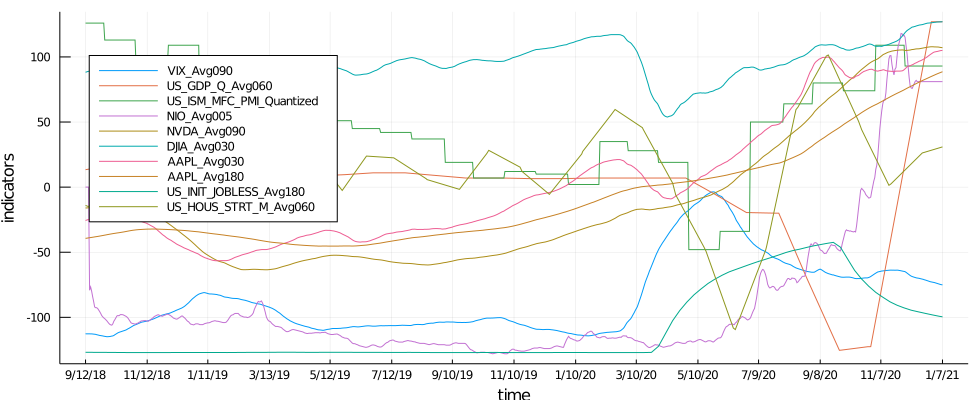

In [16]:
using Plots

record_count = size(uber)[1]
rows = 1:record_count
dates = format_dates( uber[rows,2] , "m/d/yy")

gr()
plot( dates, # x-axis: dates
     [ 
        uber[rows,8] uber[rows,15] uber[rows,20] uber[rows,28] uber[rows,39] uber[rows,45] uber[rows,53] uber[rows,57] uber[rows,65]  uber[rows,78]         
    ], # y-axis
    label = [      
        columns[8]     columns[15]   columns[20]   columns[28] columns[39]   columns[45]   columns[53] columns[57] columns[65] columns[78] "" 
    ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

In [17]:
savefig("../../indicators.png")

## Divide Training and Prediction data sets

In [18]:
record_count = size(uber)[1]
today_rata = Dates.datetime2rata( today() )
today_id = find_day(uber, today_rata)

# I am putting overlap in the sets to see the behavior
df_training   = uber[1:today_id-5,:] # train up 5 days ago, I want to see real prediction for last few days.
df_prediction = uber[today_id-90:record_count,:] # show predictions up to 90 days ago

println()

### Save Datasets

In [19]:
save_dataset(df_training,   "uber_training.csv"  , "../Data/processed/");
save_dataset(df_prediction, "uber_prediction.csv", "../Data/processed/");